# Clusterização e Recomendação de Livros na Plataforma Kindle: Uma Abordagem Baseada em Padrões


### Desenvolvido por: Fernanda Paula Rocha


## Introdução
Este projeto realiza a clusterização de um conjunto de dados contendo informações sobre livros disponíveis na plataforma Kindle. O objetivo é explorar padrões nos dados e agrupar os livros com base em alguns dos atributos do conjunto de dados. Essa abordagem pode ajudar a identificar padrões interessantes nos diferentes grupos de livros. Ao final do projeto, é elaborado um sistema de recomendação. 

## Conjunto de Dados
O conjunto de dados utilizado é o **'kindle_data-v2.csv'**. Abaixo, é fornecido uma visão geral das variáveis presentes no conjunto de dados:

1. **`asin`:** Identificador único para o produto no formato ASIN (Amazon Standard Identification Number).
2. **`title`:** Título do livro ou produto.
3. **`author`:** Nome do autor do livro ou produto.
4. **`soldBy`:** Entidade que vende o produto.
5. **`imgUrl`:** URL da imagem associada ao produto.
6. **`productURL`:** URL do produto.
7. **`stars`:** Avaliação média do produto, em estrelas.
8. **`reviews`:** Número total de avaliações do produto.
9. **`price`:** Preço do produto.
10. **`isKindleUnlimited`:** Indica se o produto está disponível no programa Kindle Unlimited (booleano).
11. **`category_id`:** Identificador da categoria à qual o produto pertence.
12. **`isBestSeller`:** Indica se o produto é um best-seller (booleano).
13. **`isEditorsPick`:** Indica se o produto é uma escolha dos editores (booleano).
14. **`isGoodReadsChoice`:** Indica se o produto é uma escolha do Goodreads (booleano).
15. **`publishedDate`:** Data de publicação do produto.
16. **`category_name`:** Nome da categoria à qual o produto pertence.

## Objetivo
O objetivo é realizar a clusterização dos livros para identificar padrões e agrupar livros similares. Os critérios para a similaridade incluem as avaliações médias dos livros, os preços, se foram escolhidos pelos editores, se são populares no Goodreads, se estão disponíveis no programa Kindle Unlimited e se são best-sellers. Ao final, será elaborado um sistema de recomendação com base em características de cada cluster. 



# ------------------------------------------------------------------
# Carregamento e Exploração Inicial dos Dados
# ------------------------------------------------------------------

In [1]:
# --------------------------------------------------------------
# Importação de Bibliotecas
# --------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import sklearn 

from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Versões das bibliotecas utilizadas:
# Pandas: 1.4.2
# NumPy: 1.22.3
# Matplotlib: 3.4.3
# Seaborn: 0.12.1
# Scipy: 1.7.3
# Scikit-learn: 1.1.3

In [2]:
print("Versões das bibliotecas utilizadas:")
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Scipy:", scipy.__version__)
print("Scikit-learn:", sklearn.__version__)


Versões das bibliotecas utilizadas:
Pandas: 1.4.2
NumPy: 1.22.3
Matplotlib: 3.4.3
Seaborn: 0.12.1
Scipy: 1.7.3
Scikit-learn: 1.1.3


In [3]:
df = pd.read_csv('data/kindle_data-v2.csv')

print("Primerias linhas do conjunto de dados:")
df.head()

Primerias linhas do conjunto de dados:


,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


### Análise do resumo estatístico

In [4]:
# Resumo estatístico
print("\nResumo estatístico:")
print(df.describe())



Resumo estatístico:
               stars        reviews          price    category_id
count  133102.000000  133102.000000  133102.000000  133102.000000
mean        4.404090     887.375779      15.134127      16.287111
std         0.745646    5104.878777      22.254986       8.416924
min         0.000000       0.000000       0.000000       1.000000
25%         4.400000       0.000000       4.990000       9.000000
50%         4.500000       4.000000       9.990000      16.000000
75%         4.700000     365.000000      14.990000      23.000000
max         5.000000  618227.000000     682.000000      31.000000


A média de avaliações (``stars``) dos livros no conjunto de dados é de aproximadamente 4.4 estrelas, indicando, em geral, boas avaliações. A distribuição das avaliações é relativamente compacta, com uma mediana de 4.5 estrelas. No entanto, a presença de uma avaliação mínima de 0 pode exigir uma investigação adicional para entender se há erros ou razões específicas para essa avaliação.


O número médio de avaliações (``reviews``) por livro é relativamente baixo, com uma média de 887 avaliações. No entanto, a presença de valores extremamente altos (por exemplo, o máximo de 618,227 avaliações) sugere que alguns livros têm um número significativamente maior de avaliações do que a média.


O preço médio (``price``) dos livros no conjunto de dados é de aproximadamente $\$15.13$, com uma mediana de $\$9.99$. A presença de um preço máximo de  $\$6824$ pode indicar a presença de livros significativamente mais caros no conjunto de dados.


A maioria dos livros não está disponível no programa Kindle Unlimited, o que sugere uma variedade de modelos de negócios dentro do conjunto de dados. A presença de colunas booleanas indica se um livro é um best-seller, uma escolha dos editores ou uma escolha do Goodreads. Essas categorias serão exploradas durante a análise de clusters para entender se há padrões específicos associados a essas características.

**Conclusões**

A análise do resumo estatístico revela uma variedade de padrões e características interessantes no conjunto de dados. Essas observações fornecem uma base para a próxima etapa do projeto, que envolve a clusterização dos livros com base nessas variáveis.


### Análise das Informações 

In [5]:
print("Informações sobre tipos de dados e valores nulos:")
print(df.info())

Informações sobre tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  c

Todos os livros no conjunto de dados possuem um identificador único (``asin``), sem valores nulos. Este identificador pode ser crucial para a identificação única dos livros durante a análise de clusters. Com todos os livros possuindo títulos, sem valores nulos. A variável pode ser essencial para a identificação e interpretação dos resultados.

Alguns livros não têm informações sobre o autor, indicando valores nulos nesta variável. Investigar a ausência de informações pode ser relevante para entender padrões ou razões específicas.

Há valores nulos na coluna `soldBy`, indicando que algumas informações sobre quem vende o produto estão ausentes. A identificação das entidades que mais vendem pode ser útil para análises futuras.

A avaliação média dos livros varia de 0 a 5 estrelas, com uma média de aproximadamente 4.4. A presença de uma avaliação mínima de 0 pode requerer uma investigação adicional para compreender possíveis erros ou razões específicas.

O número médio de avaliações por livro é relativamente baixo, com uma média de 887 avaliações. No entanto, a presença de valores extremamente altos sugere que alguns livros têm um número significativamente maior de avaliações do que a média.


Todas as variáveis ``booleanas`` estão completas, sem valores nulos. Elas podem ser úteis para identificar características especiais dos livros, como sua disponibilidade no Kindle Unlimited ou se são best-sellers.


Ambas as colunas ``category_id`` e ``category_name`` estão completas, sem valores nulos. A categoria dos livros pode ser útil para análises específicas, especialmente durante a clusterização.

Há valores nulos na coluna `publishedDate`, indicando que algumas informações sobre a data de publicação estão ausentes. Explorar a influência da data de publicação nos padrões de avaliação ou preço pode ser uma investigação futura.

### Análise de distribuição

Verificar a distribuição de variáveis contínuas como `price`, `stars` e `reviews`. Isso pode ajudar a entender a faixa de preços dos livros, a distribuição das avaliações e o número de avaliações

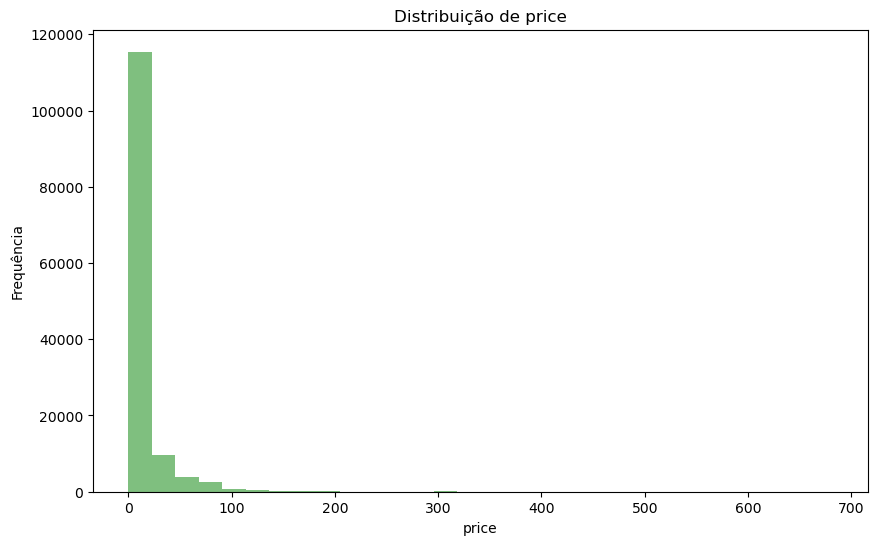

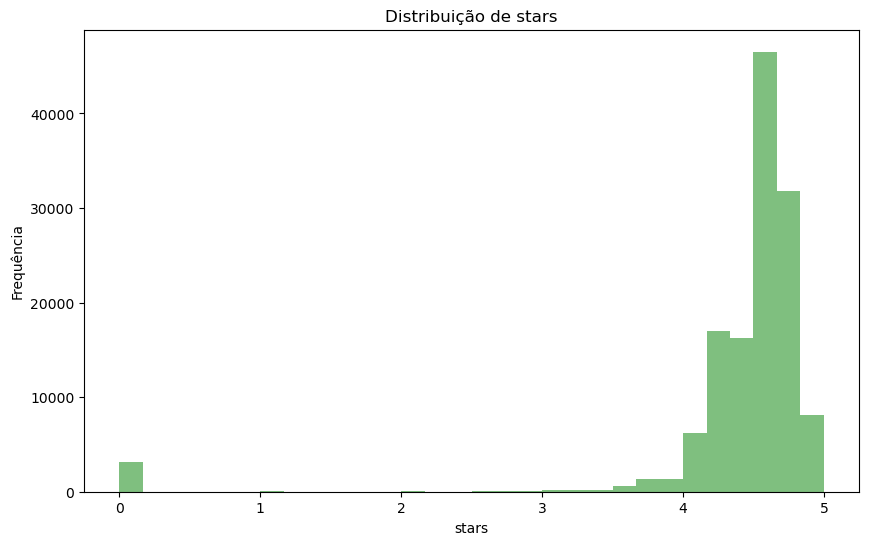

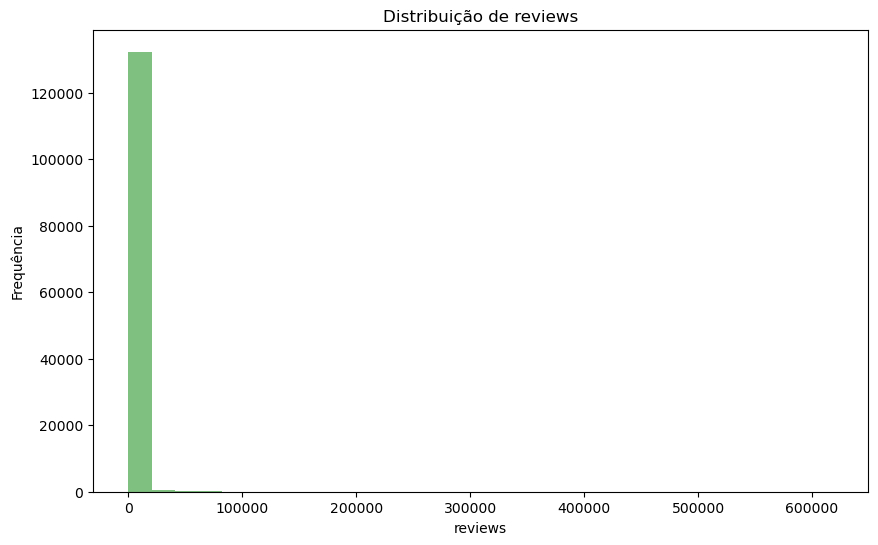

In [6]:
variables = ['price', 'stars', 'reviews']

for var in variables:
    
    data = df[var].dropna()
    
    plt.figure(figsize=(10,6))
    plt.hist(data, bins=30, alpha=0.5, color='g')    

    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()


### Análise de correlação

Verificar a correlação entre diferentes variáveis. Por exemplo, existe uma correlação entre o preço e a avaliação média (`stars`)? Ou entre o número de avaliações e a avaliação média?

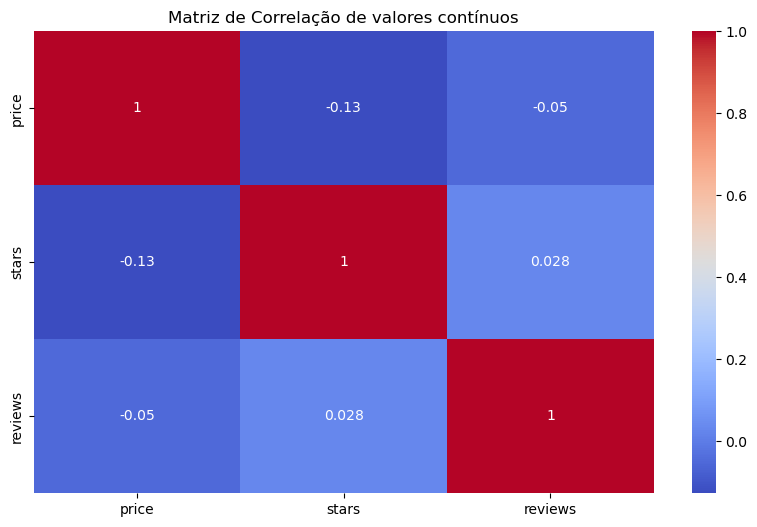

In [7]:
variables_corr = ['price', 'stars', 'reviews']

corr_matrix = df[variables_corr].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação de valores contínuos')
plt.show()


``Price`` e ``Stars`` (-0.126705): Existe uma correlação negativa fraca entre o preço e as avaliações dos produtos. Isso sugere que, em geral, quando o preço aumenta, a avaliação tende a diminuir ligeiramente, e vice-versa. No entanto, a correlação é fraca, o que significa que existem muitos outros fatores que influenciam a avaliação além do preço.

``Price`` e ``Reviews`` (-0.050218): A correlação entre o preço e o número de avaliações é ainda mais fraca e também negativa. Isso sugere que produtos mais caros tendem a ter ligeiramente menos avaliações, mas a relação é muito fraca para tirar conclusões definitivas.

``Stars`` e ``Reviews`` (0.028204): Existe uma correlação positiva muito fraca entre as avaliações e o número de avaliações. Isso sugere que produtos com avaliações mais altas podem ter ligeiramente mais avaliações, mas a relação é tão fraca que é quase inexistente.

### Análise temporal

Como a data de publicação estiver disponível, posso analisar as tendências ao longo do tempo. Por exemplo, houve um aumento no número de livros publicados ao longo dos anos? Existem certos meses em que mais livros são publicados? 

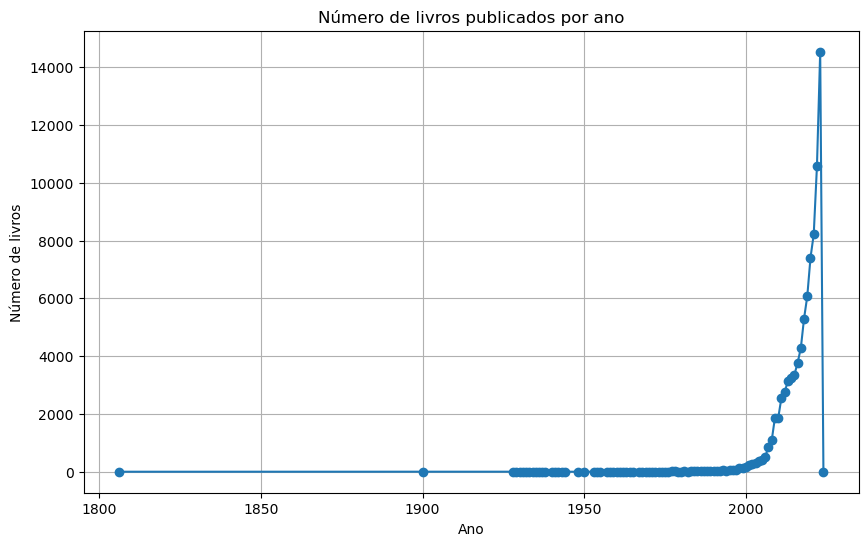

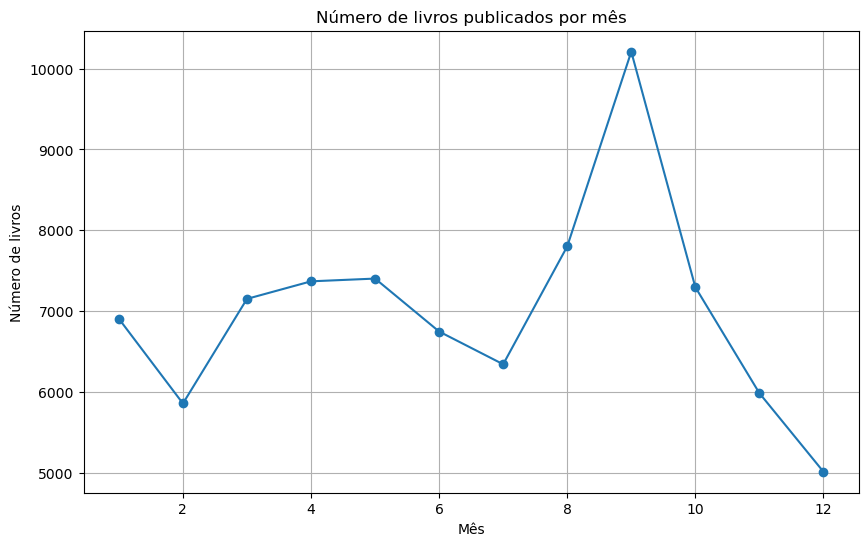

In [8]:
# Convertendo a data de publicação para o tipo datetime
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Extraindo o ano e o mês da data de publicação
df['year'] = df['publishedDate'].dt.year
df['month'] = df['publishedDate'].dt.month

# Contando o número de livros publicados por ano
books_per_year = df['year'].value_counts().sort_index()

# Contando o número de livros publicados por mês
books_per_month = df['month'].value_counts().sort_index()

# Criando o gráfico para o número de livros por ano
plt.figure(figsize=(10,6))
plt.plot(books_per_year.index, books_per_year.values, marker='o')
plt.title('Número de livros publicados por ano')
plt.xlabel('Ano')
plt.ylabel('Número de livros')
plt.grid(True)
plt.show()

# Criando o gráfico para o número de livros por mês
plt.figure(figsize=(10,6))
plt.plot(books_per_month.index, books_per_month.values, marker='o')
plt.title('Número de livros publicados por mês')
plt.xlabel('Mês')
plt.ylabel('Número de livros')
plt.grid(True)
plt.show()


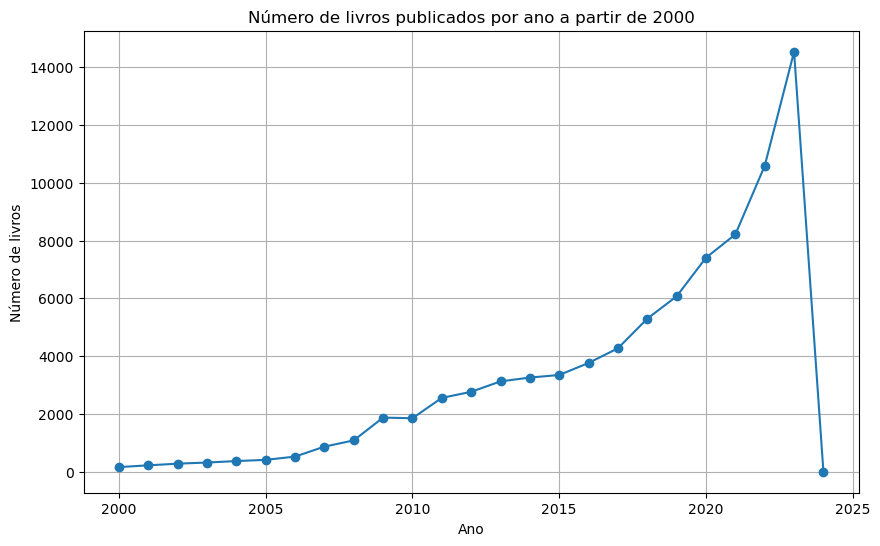

In [9]:
# Filtrando os dados para incluir apenas os livros publicados a partir do ano 2000
df_2000_onwards = df[df['year'] >= 2000]

# Contando o número de livros publicados por ano a partir de 2000
books_per_year_2000_onwards = df_2000_onwards['year'].value_counts().sort_index()

# Contando o número de livros publicados por mês a partir de 2000
books_per_month_2000_onwards = df_2000_onwards['month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(books_per_year_2000_onwards.index, books_per_year_2000_onwards.values, marker='o')
plt.title('Número de livros publicados por ano a partir de 2000')
plt.xlabel('Ano')
plt.ylabel('Número de livros')
plt.grid(True)
plt.show()

**Livros publicados por ano**: O crescimento exponencial das publicações a partir do ano 2000 pode ser atribuído a vários fatores. Por exemplo, o advento e a popularização da internet e das tecnologias digitais podem ter facilitado a publicação e distribuição de livros. Além disso, a globalização pode ter contribuído para um maior intercâmbio cultural, resultando em mais livros sendo publicados. No entanto, a diminuição subsequente das publicações pode ser devido a uma saturação do mercado, mudanças nos hábitos de leitura ou uma preferência crescente por conteúdo digital em vez de livros físicos. Seria útil ter mais dados para entender melhor essas tendências.

**Livros publicados por mês**: A maioria das publicações ocorre entre julho e outubro. Isso pode ser devido ao fato de que muitas editoras programam lançamentos de livros para coincidir com eventos específicos, como feiras de livros ou a temporada de férias, quando as pessoas têm mais tempo para ler. Além disso, o leve aumento nas publicações entre fevereiro e maio pode ser atribuído à primavera no hemisfério norte, quando as pessoas geralmente têm mais tempo livre e estão mais propensas a começar novos livros. No entanto, essas são apenas suposições e seria útil ter mais dados para confirmar essas tendências.

### Análise de vendas por categoria e total arrecadado

In [10]:
# Agrupando por categoria, contando o número de livros e calculando a média de preço
grouped = df.groupby('category_name').agg({'title': 'count', 'price': 'mean'})

# Calculando a receita total para cada categoria
grouped['total_revenue'] = grouped['title'] * grouped['price']

# Renomeando as colunas para refletir as novas quantidades
grouped.columns = ['number_of_books', 'average_price', 'total_revenue']

# Ordenando os resultados por número de livros
grouped = grouped.sort_values(by='number_of_books', ascending=False)

print('As categorias mais vendidas, a média de preço e a receita total:\n', grouped)

As categorias mais vendidas, a média de preço e a receita total:
                               number_of_books  average_price  total_revenue
category_name                                                              
Mystery, Thriller & Suspense             6272       7.600070       47667.64
Engineering & Transportation             6162      27.385427      168749.00
Science & Math                           5955      32.405835      192976.75
Parenting & Relationships                5901      10.125086       59748.13
Children's eBooks                        5747       8.248013       47401.33
Teen & Young Adult                       5738       7.709683       44238.16
Foreign Language                         5724       8.301635       47518.56
Travel                                   5526       9.784083       54066.84
LGBTQ+ eBooks                            5517       5.804544       32023.67
Computers & Technology                   5504      23.654760      130195.80
Crafts, Hobbies & Home

Agrupamos os dados por categoria e calculamos o número de livros vendidos, o preço médio e a receita total para cada categoria. Aqui estão algumas das nossas descobertas:

1. **Mystery, Thriller & Suspense** é a categoria mais vendida com 6272 livros vendidos e um preço médio de 7.60, gerando uma receita total de 47667.64.

2. **Engineering & Transportation** e **Science & Math** seguem de perto, com 6162 e 5955 livros vendidos, respectivamente, e preços médios de 27.39 e 32.41, gerando uma receita total de 168749.00 e 192976.75, respectivamente.

3. As categorias **Nonfiction** e **Comics** têm o menor número de vendas entre as categorias listadas, com 899 e 478 vendas, respectivamente.

4. A categoria **Law** tem o preço médio mais alto de 42.48, enquanto a categoria **LGBTQ+ eBooks** tem o preço médio mais baixo de 5.80.

5. As categorias relacionadas à educação e tecnologia, como **Engineering & Transportation**, **Science & Math**, **Computers & Technology**, e **Education & Teaching**, estão entre as mais vendidas, sugerindo uma alta demanda por livros educacionais e técnicos.

6. Livros de entretenimento e lazer, como **Mystery, Thriller & Suspense**, **Children's eBooks**, **Teen & Young Adult**, e **Humor & Entertainment** também são populares, indicando um interesse do público em literatura de entretenimento.

7. As categorias **Medical**, **Business & Money**, **Romance**, **History**, **Health, Fitness & Dieting**, **Nonfiction**, e **Comics** têm menos vendas em comparação com outras categorias, o que pode indicar uma demanda menor ou uma oferta menor de livros nessas categorias.

Essas são apenas inferências baseadas nos dados fornecidos e podem não refletir o quadro completo do mercado de livros da Amazon. Além disso, esses números são absolutos e não levam em conta o número total de livros disponíveis em cada categoria. Para uma análise mais precisa, seria útil ter informações sobre o número total de livros em cada categoria.


In [11]:
# Convertendo a data de publicação para o tipo datetime e extraindo o ano
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df['year'] = df['publishedDate'].dt.year

# Calculando a receita para cada livro
df['revenue'] = df['price']

# Agrupando por categoria e ano, contando o número de livros, calculando a média de preço e a receita total
grouped = df.groupby(['category_name', 'year']).agg({'title': 'count', 'price': 'mean', 'revenue': 'sum'})

# Renomeando as colunas para refletir as novas quantidades
grouped.columns = ['number_of_books', 'average_price', 'total_revenue']

# Resetando o índice
grouped = grouped.reset_index()

# Encontrando o ano de maior receita para cada categoria
idx = grouped.groupby('category_name')['total_revenue'].idxmax()
best_years = grouped.loc[idx]

# Selecionando apenas as colunas relevantes
best_years = best_years[['category_name', 'year', 'total_revenue']]

# Ordenando o DataFrame da maior para a menor receita
best_years = best_years.sort_values(by='total_revenue', ascending=False)

print('O ano de maior receita para cada categoria e o valor arrecadado:\n', best_years)

O ano de maior receita para cada categoria e o valor arrecadado:
                      category_name    year  total_revenue
576                            Law  2022.0       27232.01
917                 Science & Math  2021.0       24075.88
247         Computers & Technology  2023.0       21657.29
390   Engineering & Transportation  2020.0       13754.32
638                        Medical  2022.0       13493.33
352           Education & Teaching  2021.0       11652.83
90           Biographies & Memoirs  2023.0       10350.20
780     Politics & Social Sciences  2023.0        9004.20
123               Business & Money  2021.0        8965.07
284         Cookbooks, Food & Wine  2023.0        8942.46
322         Crafts, Hobbies & Home  2023.0        7386.45
1090                        Travel  2022.0        7321.06
735      Parenting & Relationships  2023.0        6957.93
46             Arts & Photo graphy  2023.0        6950.52
856        Religion & Spirituality  2023.0        6494.30
207   

Agrupamos os dados por categoria e ano, e calculamos a receita total para cada combinação. Aqui estão algumas das nossas descobertas:

1. A categoria **Law** teve a maior receita em 2022, arrecadando um total de 27232.01, por sua média de preço ser a mais alta, mesmo com vendas não ficando nas primeiras colocações.

2. **Science & Math** e **Computers & Technology** seguiram de perto, com receitas totais de 24075.88 em 2021 e 21657.29 em 2023, respectivamente.

3. A categoria **Comics** teve a menor receita entre as categorias listadas, com uma receita total de apenas 15.78 em 2017.

4. A categoria **Foreign Language** também teve uma receita baixa, arrecadando apenas 7.99 em 2022.

Um fato, as maiores arrecadações em todas as categorias, exceto **comics** aconteceram no período pandêmico, com as maiores vendas sendo de livros educacionais, indicando que os compradores aproveitaram o tempo para se especializar, em especifico, no ano de 2020 (prineiro ano de pandemia) a categoria que arrecadou mais dinheiro foi  **Engineering & Transportation**, seguidos de **Science & Math** e **Computers & Technology**, implicando que o fattor social pode ter sido relevante para a procura, dado tamém que esses profissionais foram bastante requisitados. 

Essas são apenas inferências baseadas nos dados fornecidos e podem não refletir o quadro completo do mercado de livros da Amazon. Além disso, esses números são absolutos e não levam em conta o número total de livros disponíveis em cada categoria. Para uma análise mais precisa, seria útil ter informações sobre o número total de livros em cada categoria.


# --------------------------------------------------------------
# Pré-processamento de Dados
# --------------------------------------------------------------

### Tratamento de valores ausentes

Para a coluna ``author``, ``soldBy``, considere estratégias como preenchimento dos valores nulos com "Desconhecido". Para ``publishedDate`` será incorporado uma datas imbólica, como '1900-01-01', para indicar que a data de publicação é desconhecida. 

In [12]:
# Preencher valores nulos na coluna 'author' com 'Desconhecido'
df['author'] = df['author'].fillna('Desconhecido')

# Verificar se os valores nulos foram preenchidos corretamente
print(df['author'].isnull().sum())

0


In [13]:
# Preencher valores nulos em 'publishedDate' e 'soldBy'
df['publishedDate'].fillna('1900-01-01', inplace=True)
df['soldBy'].fillna('Desconhecido', inplace=True)


### Transformação de variáveis booleanas em categóricas

In [14]:
# Selecionar as colunas booleanas a serem transformadas
colunas_booleanas = ['isKindleUnlimited', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice']

# Transformar as variáveis booleanas em categóricas (0 para False, 1 para True)
df[colunas_booleanas] = df[colunas_booleanas].astype(int)

# Visualizar as primeiras linhas do DataFrame após a transformação
print(df.head())


         asin                                              title  \
0  B00TZE87S4  Adult Children of Emotionally Immature Parents...   
1  B08WCKY8MB  From Strength to Strength: Finding Success, Ha...   
2  B09KPS84CJ  Good Inside: A Guide to Becoming the Parent Yo...   
3  B07S7QPG6J             Everything I Know About Love: A Memoir   
4  B00N6PEQV0  The Seven Principles for Making Marriage Work:...   

              author                    soldBy  \
0  Lindsay C. Gibson   Amazon.com Services LLC   
1   Arthur C. Brooks   Penguin Group (USA) LLC   
2      Becky Kennedy  HarperCollins Publishers   
3     Dolly Alderton  HarperCollins Publishers   
4       John Gottman          Random House LLC   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/713KZTsaYp...   
1  https://m.media-amazon.com/images/I/A1LZcJFs9E...   
2  https://m.media-amazon.com/images/I/71RIWM0sv6...   
3  https://m.media-amazon.com/images/I/71QdQpTiKZ...   
4  https:/

In [15]:
# Obter pares únicos de "category_id" e "category_name"
categorias_unicas = df[['category_id', 'category_name']].drop_duplicates()

# Visualizar as categorias e seus números correspondentes
print(categorias_unicas)


        category_id                 category_name
0                 6     Parenting & Relationships
5144             11  Engineering & Transportation
11306            15                Science & Math
17261            21  Mystery, Thriller & Suspense
23524            26        Crafts, Hobbies & Home
28600             5          Literature & Fiction
32752             9         Biographies & Memoirs
38157            10        Computers & Technology
43661            14    Politics & Social Sciences
47868            16            Teen & Young Adult
53606            19              Foreign Language
59330            23     Science Fiction & Fantasy
63325            24                        Travel
68851            28                 LGBTQ+ eBooks
74368            30       Religion & Spirituality
79338             1           Arts & Photo graphy
84254             2                        Comics
84732             3          Education & Teaching
89718             4                       History




### Relevância das Variáveis para Clusterização

A relevância das variáveis para a clusterização depende do objetivo específico da análise e dos padrões que você espera encontrar nos dados. No entanto, com base no objetivo declarado de realizar a clusterização dos livros com base nas avaliações médias e preços, algumas variáveis podem ser consideradas mais relevantes:

1. **``stars`` (Avaliação Média):**
   - Fundamental para a clusterização, pois você está agrupando os livros com base nas avaliações médias.

2. **``reviews`` (Número de Avaliações):**
   - Pode ser relevante para entender a popularidade de um livro, e clusters podem surgir com base no número de avaliações.

3. **``price`` (Preço):**
   - Importante para considerar se existem padrões de preço entre os clusters de livros.

4. **``isKindleUnlimited``, ``isBestSeller``, ``isEditorsPick``, ``isGoodReadsChoice`` (Variáveis Booleanas):**
   - Essas variáveis indicam características especiais dos livros e podem contribuir para a formação de clusters distintos.

5. **``category_id`` e ``category_name`` (ID e Nome da Categoria):**
   - Se os livros estão agrupados por categoria, essas variáveis podem ser relevantes para a clusterização.

6. **``publishedDate`` (Data de Publicação):**
   - Pode ser útil se você espera que a data de publicação tenha influência nos padrões de avaliações ou preços.

Variáveis como ``asin`` (identificador único), ``title`` (título do livro), ``author`` (autor) podem não ser tão relevantes para a clusterização, pois são informações mais específicas e podem não contribuir significativamente para a formação de grupos com base em avaliações médias e preços.

Além disso, durante a análise, você pode explorar interações entre essas variáveis para identificar padrões mais complexos. A escolha final de variáveis dependerá das descobertas ao explorar os dados e da qualidade dos clusters gerados pelos algoritmos.


# --------------------------------------------------------------
# Aplicação do Algoritmo K-means
# --------------------------------------------------------------


### Justificativa:

O K-means é um algoritmo eficaz quando o número de clusters é conhecido ou estimado. Considerando o objetivo de agrupar livros com base em avaliações médias e preços, o K-means é apropriado para encontrar grupos distintos e compactos. A natureza iterativa do K-means também é eficiente para conjuntos de dados extensos, como o de livros.

###  Encontrando o melhor K com o método do "Cotovelo" (Elbow Method).

Este método envolve a execução do algoritmo K-means para diferentes valores de k e a plotagem da variabilidade explicada em função do número de clusters. O ponto onde a variabilidade deixa de diminuir significativamente é o ponto de "cotovelo", indicando um valor razoável para k.


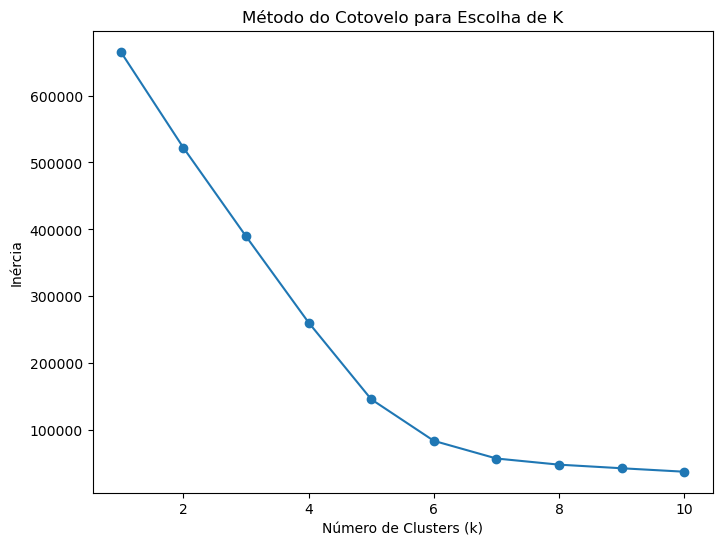

In [16]:
# Selecionar variáveis relevantes para K-means
variaveis_kmeans = ['stars', 'price','isKindleUnlimited', 'isBestSeller', 'isGoodReadsChoice']

data_kmeans = df[variaveis_kmeans]

# Preencher valores nulos com a média
#data_kmeans.fillna(data_kmeans.mean(), inplace=True)


scaler = StandardScaler()
data_kmeans_scaled = scaler.fit_transform(data_kmeans)

# Reduzir a dimensionalidade para visualização
pca = PCA(n_components=2)
data_kmeans_pca = pca.fit_transform(data_kmeans_scaled)

# Aplicar o método do cotovelo para encontrar o valor de k
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_kmeans_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Escolha de K')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()


# K-means

In [17]:
variaveis_kmeans = ['stars', 'price', 'isKindleUnlimited', 'isBestSeller', 'isGoodReadsChoice']

# Filtrar o DataFrame e criar uma cópia
data_kmeans = df[variaveis_kmeans].copy()

# Preencher valores nulos com a média
# for column in ['stars', 'price','isKindleUnlimited', 'isBestSeller', 'isGoodReadsChoice']:
#     data_kmeans[column].fillna(data_kmeans[column].mean(), inplace=True)

# # Normalizar os dados
scaler = StandardScaler()
data_kmeans_scaled = scaler.fit_transform(data_kmeans[['stars', 'price','isKindleUnlimited', 'isBestSeller', 'isGoodReadsChoice']])

# Aplicar K-means com k=5
kmeans = KMeans(n_clusters=5, random_state=42)
data_kmeans['kmeans_cluster'] = kmeans.fit_predict(data_kmeans_scaled)

# Visualizar os resultados
print(data_kmeans[['stars', 'price', 'isKindleUnlimited',  'isBestSeller', 'isGoodReadsChoice', 'kmeans_cluster']].head())


   stars  price  isKindleUnlimited  isBestSeller  isGoodReadsChoice  \
0    4.8   9.99                  0             1                  0   
1    4.4  16.99                  0             0                  0   
2    4.8  16.99                  0             0                  0   
3    4.2   9.95                  1             0                  0   
4    4.7  13.99                  0             0                  0   

   kmeans_cluster  
0               3  
1               0  
2               0  
3               1  
4               0  


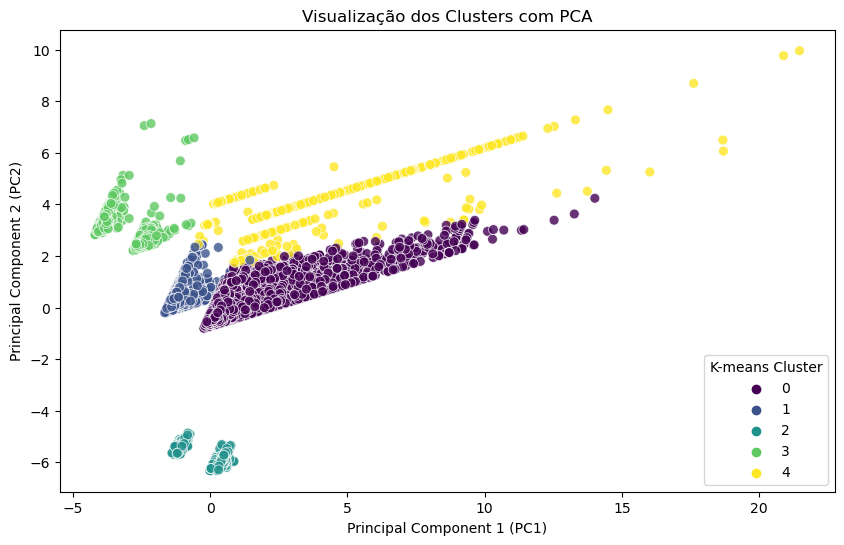

In [18]:
pca = PCA(n_components=2)
data_kmeans_pca = pca.fit_transform(data_kmeans_scaled)

# Adicionar as informações de cluster ao DataFrame
data_vis = pd.DataFrame(data_kmeans_pca, columns=['PC1', 'PC2'])
data_vis['kmeans_cluster'] = data_kmeans['kmeans_cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_cluster', data=data_vis, palette='viridis', s=50, alpha=0.8)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='K-means Cluster')
plt.show()


### Estatísticas descritivas de cada cluster

Calculando estatísticas descritivas (média, mediana, moda, desvio padrão, etc.) para cada variável dentro de cada cluster. Isso ajudará a entender as características centrais de cada cluster.


In [19]:
variaveis = ['stars', 'price', 'isKindleUnlimited', 'isBestSeller', 'isGoodReadsChoice']


cluster_groups = data_kmeans.groupby('kmeans_cluster')


for var in variaveis:
    
    stats = cluster_groups[var].agg(['mean', 'std', 'median', 'min', 'max', 'count'])
    
    # Renomear as colunas para indicar a estatística
    stats.columns = [f'{var}_{col}' for col in stats.columns]
    
    # Exibir as estatísticas descritivas
    print("------------------------------------------------------------------------------")
    print(f"Estatísticas para {var}:")
    print("------------------------------------------------------------------------------")
    print(stats)
    print("\n")
    

# calculando a moda 

variaveis = ['stars', 'price', 'isKindleUnlimited', 'isBestSeller', 'isGoodReadsChoice']


for var in variaveis:
    # Calculando a moda
    mode = cluster_groups[var].agg(lambda x: x.mode()[0])    
    
    print("------------------------------------------------------------------------------")
    print(f"Moda para {var}:")
    print("------------------------------------------------------------------------------")
    print(mode)
    print("\n")


 

 
print("------------------------------------------------------------------------------")
print(f"Valor total de vendas para cada cluster:")
print("------------------------------------------------------------------------------")
total_price = data_kmeans.groupby('kmeans_cluster')['price'].sum()
print("Soma total de vendas para cada cluster:")
print(total_price)
print("\n")  


------------------------------------------------------------------------------
Estatísticas para stars:
------------------------------------------------------------------------------
                stars_mean  stars_std  stars_median  stars_min  stars_max  \
kmeans_cluster                                                              
0                 4.530159   0.267547           4.6        2.2        5.0   
1                 4.476153   0.267165           4.5        2.0        5.0   
2                 4.511626   0.195087           4.5        3.6        4.9   
3                 4.491995   0.366376           4.5        0.0        5.0   
4                 0.079239   0.392334           0.0        0.0        4.1   

                stars_count  
kmeans_cluster               
0                     92583  
1                     33543  
2                      1402  
3                      2236  
4                      3338  


-----------------------------------------------------------------


### Análise dos resultados das estatísticas 

Com base nas estatísticas fornecidas, podemos inferir algumas características sobre cada cluster:

1. **Cluster 0**:
Classificação média (`stars_mean`) moderadamente alta (4.53) com moda de 4.6, indicando que a maioria dos livros neste cluster recebeu avaliações positivas.
Preço médio (`price_mean`) alto (17.98) com moda de 9.99, sugerindo que a maioria dos livros são caros.
Todos os livros não estão disponíveis no Kindle Unlimited (0.0).
Nenhum livro é classificado como Best Seller (0.0).
Nenhum livro é classificado como GoodReadsChoice (0.0).


2. **Cluster 1**:
Classificação média de avaliação (`stars_mean`)  ligeiramente inferior ao cluster 0 (4.48) com moda de 4.5, indicando que a maioria dos livros neste cluster recebeu avaliações mistas.
Preço médio (`price_mean`) baixo (5.89) com moda de 4.99, sugerindo que a maioria dos livros são baratos.
Todos os livros estão disponíveis no Kindle Unlimited (1.0).
Nenhum livro é classificado como Best Seller (0.0).
Nenhum livro é classificado como GoodReadsChoice (0.0).


3. **Cluster 2**:
Classificação média de avaliação (`stars_mean`)  similar ao cluster 0 (4.51) com moda de 4.6, indicando que a maioria dos livros neste cluster recebeu avaliações positivas.
Preço médio (`price_mean`) moderado (9.71) com moda de 9.99, sugerindo que a maioria dos livros tem preço mediano.
Parcela significativa dos livros está disponível no Kindle Unlimited (0.127675).
Nenhum livro é classificado como Best Seller (0.0).
Todos os livros são classificados como GoodReadsChoice (1.0).


4. **Cluster 3**:
Classificação média de avaliação (`stars_mean`)  aos clusters anteriores (4.49) com moda de 4.6, indicando que a maioria dos livros neste cluster recebeu avaliações mistas.
Preço médio (`price_mean`) baixo (7.68) com moda de 4.99, sugerindo que a maioria dos livros são baratos.
Maioria dos livros está disponível no Kindle Unlimited (0.655188).
Todos os livros são classificados como Best Seller (1.0).
Nenhum livro é classificado como GoodReadsChoice (0.0).


5. **Cluster 4**:
Classificação média de avaliação (`stars_mean`)  extremamente baixa (0.08) com moda de 0.0, indicando que a maioria dos livros neste cluster recebeu avaliações muito negativas.
Preço médio (`price_mean`) elevado (36.31) com moda de 9.99, sugerindo que a maioria dos livros são caros.
Parcela significativa dos livros está disponível no Kindle Unlimited (0.188137).
Nenhum livro é classificado como Best Seller (0.0).
Nenhum livro é classificado como GoodReadsChoice (0.0).




### Elaborando um sistema de recomendação de livros para um usuário e identicadno qual cluster pertence

Exemplo para um usuário que gosta de livros com avaliação média de 5 estrelas, preço de $15, disponível no Kindle Unlimited e que é um best-seller.

In [20]:
def get_user_cluster(stars, price, is_kindle_unlimited, is_best_seller, is_goodreads_choice, kmeans, df):
    # Cria vetor de características do usuário
    user_features = np.array([stars, price, is_kindle_unlimited, is_best_seller, is_goodreads_choice])

    # Calcula as distâncias entre o usuário e os clusters
    distances = []
    for i in range(len(kmeans.cluster_centers_)):
        distance = np.linalg.norm(user_features - kmeans.cluster_centers_[i])
        distances.append(distance)

    # Seleciona o cluster mais próximo
    closest_cluster_index = distances.index(min(distances))
    
    # Recomenda produtos do cluster do usuário
    recommendations = df[data_kmeans['kmeans_cluster'] == closest_cluster_index]
    
    return closest_cluster_index, recommendations



In [21]:
# Exemplo de uso
user_stars = 5
user_price = 15
user_is_kindle_unlimited = 1
user_is_best_seller = 1
user_is_goodreads_choice = 0

user_cluster, recommendations = get_user_cluster(user_stars, user_price, user_is_kindle_unlimited, user_is_best_seller, user_is_goodreads_choice, kmeans, df)

print(f"Usuário atribuído ao cluster {user_cluster}")
print("Recomendações:")
print(recommendations)


Usuário atribuído ao cluster 0
Recomendações:
              asin                                              title  \
1       B08WCKY8MB  From Strength to Strength: Finding Success, Ha...   
2       B09KPS84CJ  Good Inside: A Guide to Becoming the Parent Yo...   
4       B00N6PEQV0  The Seven Principles for Making Marriage Work:...   
5       B000OVLKMM                         The Glass Castle: A Memoir   
7       B0BN5742KY  Never Enough: When Achievement Culture Becomes...   
...            ...                                                ...   
133093  B0C9MJNKY3  The Dream: The Extraordinary Revelation Of Who...   
133094  B08WRF7W4Z  Killers of the Flower Moon: Adapted for Young ...   
133096  B08BR2HFWJ           Everything Sad Is Untrue: (a true story)   
133098  B09DW752Y1  Scary Smart: Scary Smart: The Future of Artifi...   
133101  B0BS1KYZB6                                Pride and Prejudice   

                          author                                soldBy  \
1  

### Análise dos resultados da recomendação


Observações gerais ao analisar a recomendação com base nas características fornecidas:

- A maior parte dos livros recomendados pertencem à categoria **"Parenting & Relationships"**.

- A maioria dos livros não é do Kindle Unlimited, não é um best-seller e não é uma escolha do Goodreads.

- O preço dos livros varia entre **\$0.0** e **\$16.99**.

- As estrelas dos livros variam de 4.4 a 4.8.

- Esse usuário foi atribuído no cluster 0, com isso as estratédias designadas para esse cluster de usuário se aplicam a ele. 

**Observação**: os resultados da recomendação, parece que os valores de `isKindleUnlimited`, `isBestSeller` e `isGoodReadsChoice` por possui mais valores zero. Isso pode indicar que talvez seja necessário ajustar o sistema para levar em conta melhor esses desequilíbrios, se necessário.

# ----------------------------------------------------------------
# Conclusão Geral
# ----------------------------------------------------------------

Essas observações proporcionam uma visão abrangente dos tipos de livros recomendados, levando em consideração as características individuais dos usuários e o cluster ao qual suas preferências de compra são mais alinhadas. Com critérios tão específicos, torna-se possível conduzir uma análise mais aprofundada de cada cluster, permitindo-nos identificar padrões de comportamento e preferências únicas. Essa compreensão detalhada não apenas melhora a precisão das recomendações, mas também fornece insights valiosos para direcionar estratégias de marketing e promoção. Ao compreendermos os clusters e as preferências de cada grupo, podemos desenvolver abordagens estratégicas personalizadas, impulsionando assim as vendas e otimizando a experiência do usuário. Essa abordagem data-driven se revela uma ferramenta poderosa para impulsionar o sucesso e a eficiência das operações relacionadas à venda de livros. 

# ---------------------------------------------------------------------
# Possíveis estratégias para aumento de vendas
# ---------------------------------------------------------------------

Com base na análise dos clusters, aqui estão algumas sugestões para aumentar o volume de vendas dos livros:

1. **Promoções e descontos**: Livros com preços mais baixos (como os do cluster 1) tendem a ser mais acessíveis para um público maior. Oferecer promoções e descontos temporários pode incentivar mais compras.


2. **Programa Kindle Unlimited**: A disponibilidade no Kindle Unlimited parece ser um fator importante, como visto nos clusters 1 e 3. Considerar a inclusão de mais livros neste programa pode aumentar a visibilidade e, consequentemente, as vendas.


3. **Melhorar a qualidade**: O cluster 4, que tem a classificação média mais baixa, também tem o preço médio mais alto. Isso sugere que os leitores podem não estar vendo o valor em livros caros com baixas classificações. O que pode ser justificado por um público mais exigente em termos mais técnicos. Investir na melhoria da qualidade dos livros pode ajudar a aumentar as classificações e, por sua vez, as vendas. 


4. **Marketing para livros de alta classificação**: Livros com classificações mais altas (como os dos clusters 0 e 2) tendem a ser mais populares entre os leitores. Focar o marketing nesses livros pode ajudar a aumentar a visibilidade e as vendas.


5. **Explorar parcerias com Best Sellers e GoodReadsChoice**: Embora nem todos os clusters tenham livros classificados como Best Seller ou GoodReadsChoice, esses selos podem atrair mais leitores. Explorar parcerias ou promoções com esses livros pode ser benéfico.
    
    

# ---------------------------------------------------------------------
# Referências
# ---------------------------------------------------------------------


**Dataset**
1. Asaniczka. (2023). Amazon Kindle Books Dataset 2023 (130K Books). Kaggle. DOI: 10.34740/KAGGLE/DS/3808504.
Disponível em: https://www.kaggle.com/ds/3808504. 

**Livros**

1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Springer. Disponível em: https://www.statlearning.com/


2. Faceli, K., Lorena, A. C., Gama, J., & Carvalho, A. C. P. de L. F. (2011). Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina. Grupo Gen - LTC. 




